## Data Loading and Initial Exploration

This section loads the dataset and performs initial inspections to understand its structure and content.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('/content/Algerian_forest_fires_Cleaned_dataset.csv')

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [14]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


## Data Cleaning and Preparation

This section handles data cleaning steps such as stripping whitespace from column names and the target variable, and then converts the 'Classes' column into numerical representation. It also drops irrelevant columns.

In [15]:
df.columns = df.columns.str.strip()

In [16]:
df['Classes'] = df['Classes'].str.strip()

In [17]:
df['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [18]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1 )

In [19]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [20]:
df.drop(['day','month' ,'year'] ,axis =1 , inplace= True)

In [21]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0


In [22]:
x =  df.drop('FWI' , axis = 1)
y = df['FWI']

## Feature Selection

Here, we identify and remove highly correlated features from the dataset to avoid multicollinearity issues, which can affect model performance.

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 78)

<Axes: >

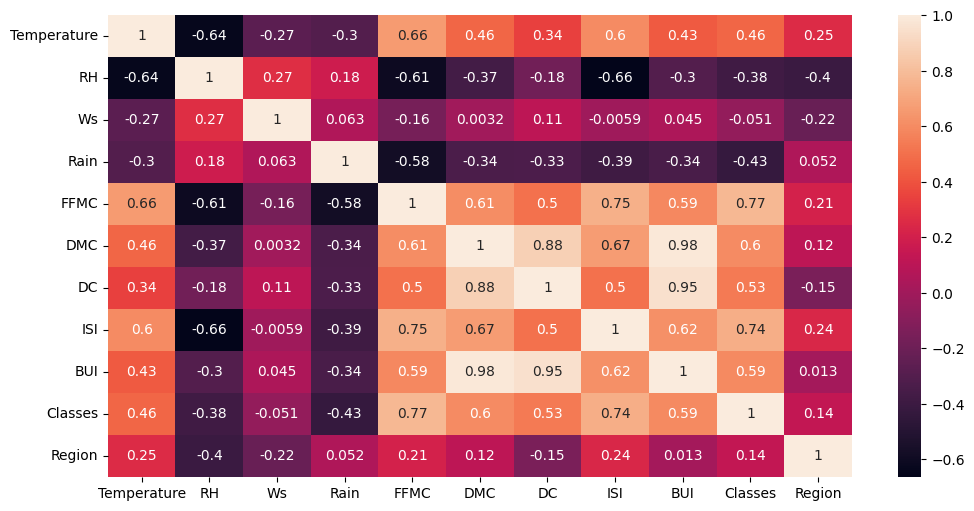

In [24]:
plt.figure(figsize = (12,6))
corr = x_train.corr()
sns.heatmap(corr , annot= True)

In [25]:
def corelation(dataset , threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [26]:
corr_features = corelation(x_train , 0.85)

In [27]:
x_train.drop(corr_features , axis = 1 , inplace = True)
x_test.drop(corr_features , axis = 1 , inplace = True)

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 147 to 197
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  194 non-null    int64  
 1   RH           194 non-null    int64  
 2   Ws           194 non-null    int64  
 3   Rain         194 non-null    float64
 4   FFMC         194 non-null    float64
 5   DMC          194 non-null    float64
 6   ISI          194 non-null    float64
 7   Classes      194 non-null    int64  
 8   Region       194 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 15.2 KB


## StandardScaler
* Intialize standard scaler

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaler = sc.fit_transform(x_train)
x_test_scaler = sc.transform(x_test)


In [30]:
x_test_scaler

array([[-6.02429559e-01,  1.44691350e-01, -5.12711058e-01,
        -4.35233089e-01,  8.81984472e-02, -7.79279087e-01,
        -6.18443147e-01, -1.13241024e+00,  1.00000000e+00],
       [ 7.85591040e-01, -4.07055519e-01, -5.12711058e-01,
        -1.79755875e-01,  7.34225415e-02,  1.93407939e+00,
        -6.43124894e-01, -1.13241024e+00,  1.00000000e+00],
       [-1.99045016e+00,  9.72311654e-01,  5.12711058e-01,
         4.16335677e+00, -2.37937780e+00, -1.11204947e+00,
        -1.11207808e+00, -1.13241024e+00, -1.00000000e+00],
       [-6.02429559e-01,  1.24818509e+00,  1.70903686e-01,
        -1.79755875e-01, -1.35984031e+00, -9.32865416e-01,
        -9.39305854e-01, -1.13241024e+00, -1.00000000e+00],
       [-1.15763780e+00,  1.17921673e+00,  8.54518430e-01,
        -3.71363786e-01, -3.55078723e-01,  1.76369181e-01,
        -7.17170134e-01, -1.13241024e+00, -1.00000000e+00],
       [-3.24825439e-01,  6.27469861e-01,  5.12711058e-01,
        -2.43625178e-01, -6.35820930e-01, -9.499305

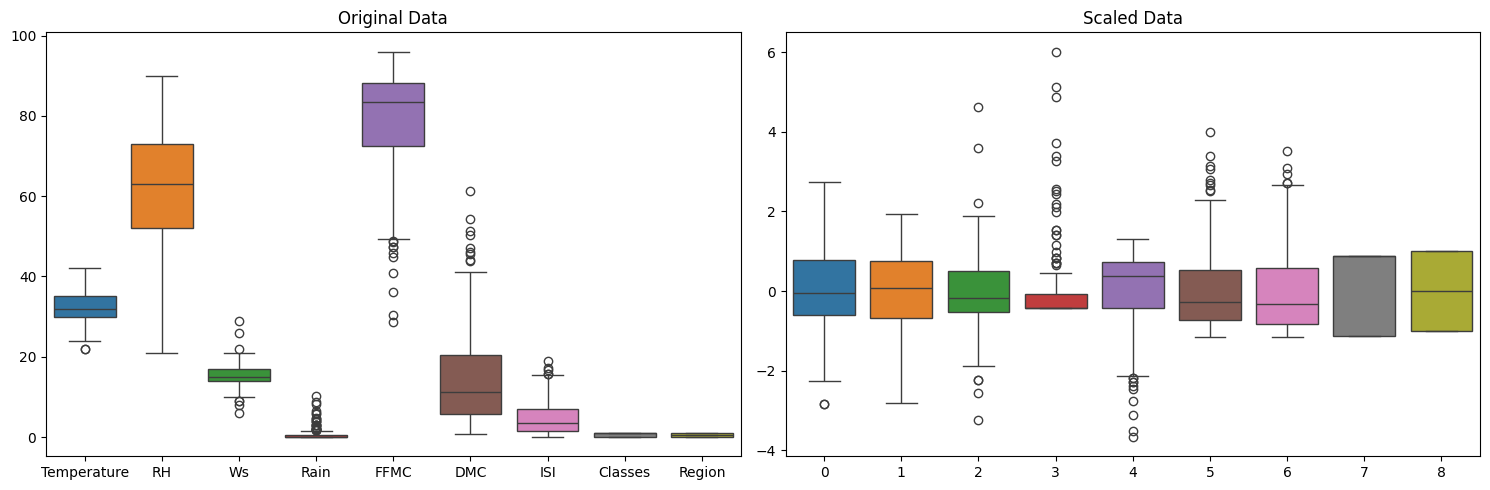

In [31]:
plt.figure(figsize=(15,5)) # Set figure size using plt.figure()
plt.subplot(1,2,1)
sns.boxplot(data = x_train) # Correct variable name
plt.title('Original Data')
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaler) # Correct variable name
plt.title('Scaled Data')
plt.tight_layout() # Adjust layout to prevent overlapping titles

## Model Training and Evaluation (Linear Regression)

This section trains a standard Linear Regression model on the scaled data and evaluates its performance using metrics like R-squared, Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
lr = LinearRegression()
lr.fit(x_train_scaler , y_train)
y_pred = lr.predict(x_test_scaler)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred)

In [33]:
r2*100

98.2911727230365

In [34]:
mae

0.7962042017055891

In [35]:
mse , rmse , mae

(1.184493021256029, np.float64(1.0883441648927186), 0.7962042017055891)

In [36]:
lr.coef_

array([ 0.04499112, -0.13396157,  0.07452622,  0.07247819, -0.7267868 ,
        3.49799643,  4.42802376,  0.44956196, -0.37060483])

## OLS Model (using statsmodels)

Here, we are using the `statsmodels` library to train an Ordinary Least Squares (OLS) regression model. This provides a more detailed statistical summary of the model, including p-values, R-squared (uncentered), and other metrics to understand the significance and coefficients of the features.

In [37]:
import statsmodels.api as sm
olsm = sm.OLS(y_train , x_train).fit()
olsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    FWI   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1244.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):                   2.17e-160
Time:                        07:14:42   Log-Likelihood:                         -321.08
No. Observations:                 194   AIC:                                      660.2
Df Residuals:                     185   BIC:                                      689.6
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     0.0267      0.031      0.849      0.397      -0.035       0.089
RH             -0.0043      0.008     -0.524      0.601      -0.021       0.012
Ws              0.0321      0.034      0.949      0.344      -0.035       0.099
Rain            0.0640      0.073      0.881      0.380      -0.079       0.207
FFMC           -0.0484      0.014     -3.579      0.000      -0.075      -0.022
DMC             0.2971      0.011     26.892      0.000       0.275       0.319
ISI             1.0961      0.049     22.496      0.000       1.000       1.192
Classes         0.8298      0.333      2.492      0.014       0.173       1.487
Region         -0.7209      0.205     -3.516      0.001      -1.125      -0.316
==============================================================================
Omnibus:                      236.766   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17308.084
Skew:                          -4.757   Prob(JB):                         0.00
Kurtosis:                      48.285   Cond. No.                         386.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

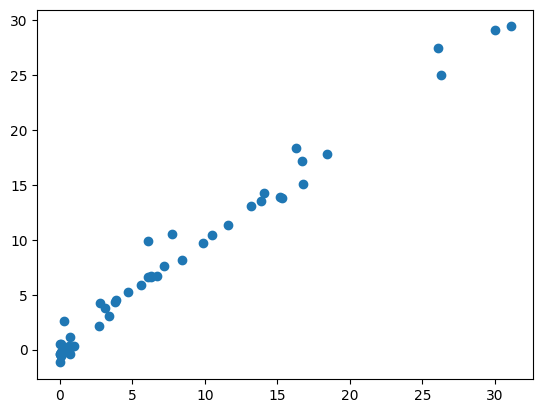

In [38]:
plt.scatter(y_test , y_pred)


## Model Training and Evaluation (Regularized Models - Lasso, Ridge, ElasticNet)

This section trains and evaluates regularized linear regression models (Lasso, Ridge, and ElasticNet) to see if regularization improves the model's performance and generalization.

(0.955388192805867,
 1.2765786390355116,
 3.0923180475541314,
 np.float64(1.7584988051045505))

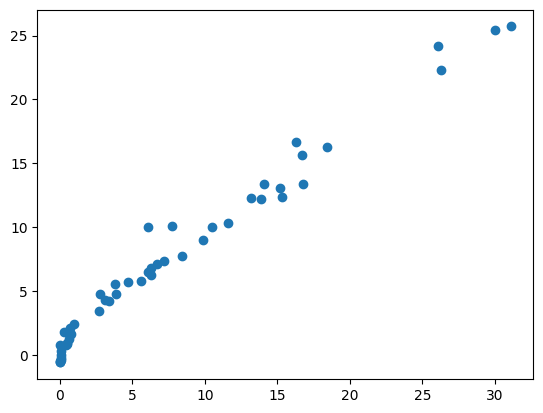

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
la = Lasso()
la.fit(x_train_scaler , y_train)
y_pred = la.predict(x_test_scaler)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred)
plt.scatter(y_test , y_pred)
r2,mae,mse,rmse

(0.9824043731508578,
 0.8156699356671974,
 1.2196608450954234,
 np.float64(1.1043825628356432))

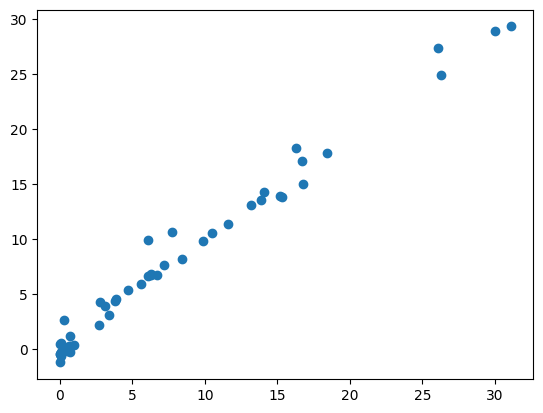

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
Rd = Ridge()
Rd.fit(x_train_scaler , y_train)
y_pred = Rd.predict(x_test_scaler)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred)
plt.scatter(y_test , y_pred)
r2,mae,mse,rmse

(0.8871718648291476,
 1.984263494337258,
 7.820810242957119,
 np.float64(2.7965711582144874))

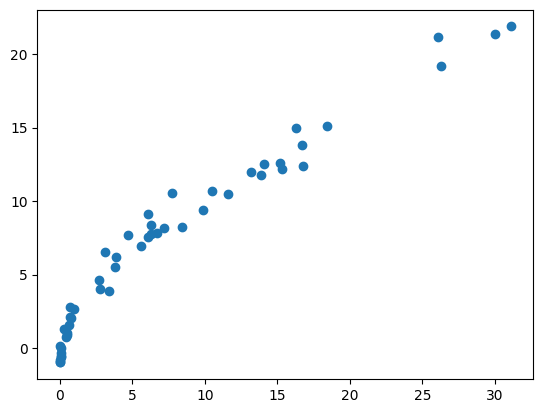

In [41]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
En = ElasticNet()
En.fit(x_train_scaler , y_train)
y_pred = En.predict(x_test_scaler)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred)
plt.scatter(y_test , y_pred)
r2,mae,mse,rmse